Data Aggregation
Problem Statement: Analyzing Sales Performance by Region in a Retail Company
Dataset: "Retail_Sales_Data.csv"
Description: The dataset contains information about sales transactions in a retail company. It
includes attributes such as transaction date, product category, quantity sold, and sales
amount. The goal is to perform data aggregation to analyze the sales performance by region
and identify the top-performing regions.
Tasks to Perform:
1. Import the "Retail_Sales_Data.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for aggregating sales data, such as region, sales
amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.
6. Identify the top-performing regions based on the highest sales amount.
7. Group the sales data by region and product category to calculate the total sales
amount for each combination.
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across
different regions and product categories

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Retail_Sales_Data.csv")

In [2]:
#explore structure and content
print(data.head())
print(data.info())
print(data.describe())
print(data.columns)
print(data.isnull().sum())

   Transaction_ID  Customer_ID State  Age Shop_Category  Sales Gender  \
0               1         1234    MP   10       Grocery     10      M   
1               2         1235    UP   21         Dairy     30      F   
2               3         1236    AP   23          Deli     23      F   
3               4         1237    RP   25          Meat     21      F   
4               5         1238    DP   27       Clothes     90      F   

   Items_in_basket  
0                2  
1                3  
2                4  
3                4  
4                3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction_ID   312 non-null    int64 
 1   Customer_ID      312 non-null    int64 
 2   State            312 non-null    object
 3   Age              312 non-null    int64 
 4   Shop_Category    312 non-null    object
 5   Sales      

In [3]:
# Select the relevant columns for aggregation
relevant_columns = data[['State', 'Sales', 'Shop_Category']] # 'State' - the region, 'Sales' - sales amount, 'Shop_Category' - the product category

In [4]:
region_sales = data.groupby('State')['Sales'].sum()
print(region_sales.head())

State
AP    12176
DP    23346
KP    10887
MP     4916
RP    11049
Name: Sales, dtype: int64


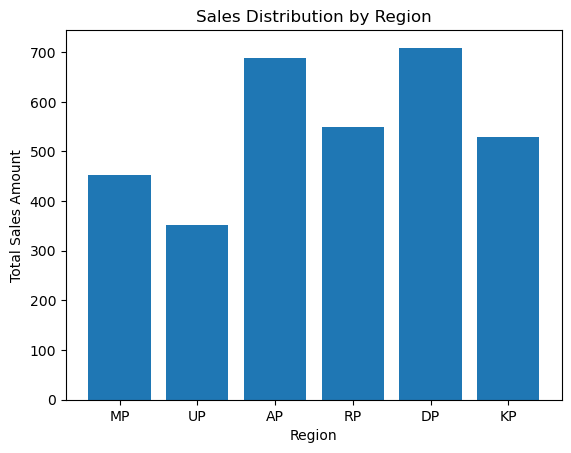

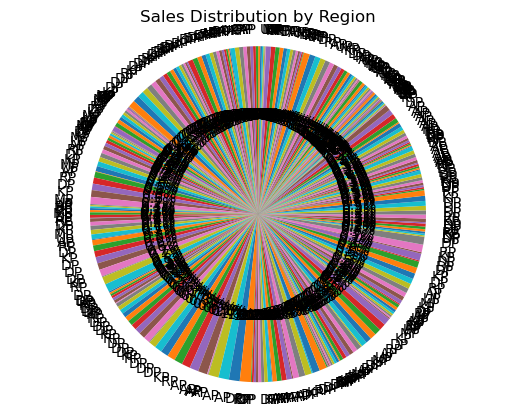

In [5]:
# Create a bar plot
plt.bar(data['State'], data['Sales'])
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region')
plt.show()

# Create a pie chart
plt.pie(data['Sales'], labels=data['State'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Sales Distribution by Region')
plt.show()

In [6]:
# Sort the region_sales DataFrame in descending order by 'Sales' column
top_regions = data.sort_values(by='Sales', ascending=False)

# Get the top-performing region
top_region = top_regions.iloc[0]
print("Top-Performing Region: ", top_region['State'])

Top-Performing Region:  DP


In [7]:
region_category_sales = data.groupby(['State', 'Shop_Category'])['Sales'].sum()
print(region_category_sales)

State  Shop_Category
AP     Clothes          2127
       Dairy            1197
       Deli             1303
       Electronics      3818
       Grocery           823
       Meat             2908
DP     Clothes          7133
       Dairy            6027
       Deli             1723
       Electronics      4645
       Grocery          1736
       Meat             2082
KP     Clothes          3581
       Dairy             630
       Deli             2595
       Electronics      2742
       Grocery            54
       Meat             1285
MP     Clothes           711
       Deli             1144
       Electronics       696
       Grocery           950
       Meat             1415
RP     Clothes          2167
       Dairy              74
       Deli             1006
       Electronics      3087
       Grocery          2452
       Meat             2263
UP     Clothes          1077
       Dairy             816
       Deli               87
       Electronics       500
       Grocery        

In [8]:
# Pivot the data to create a stacked bar plot
pivot_df = region_category_sales.pivot(index='State', columns='Shop_Category', values='Sales')

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Region and Product Category (Stacked Bar Plot)')
plt.show()


AttributeError: 'Series' object has no attribute 'pivot'

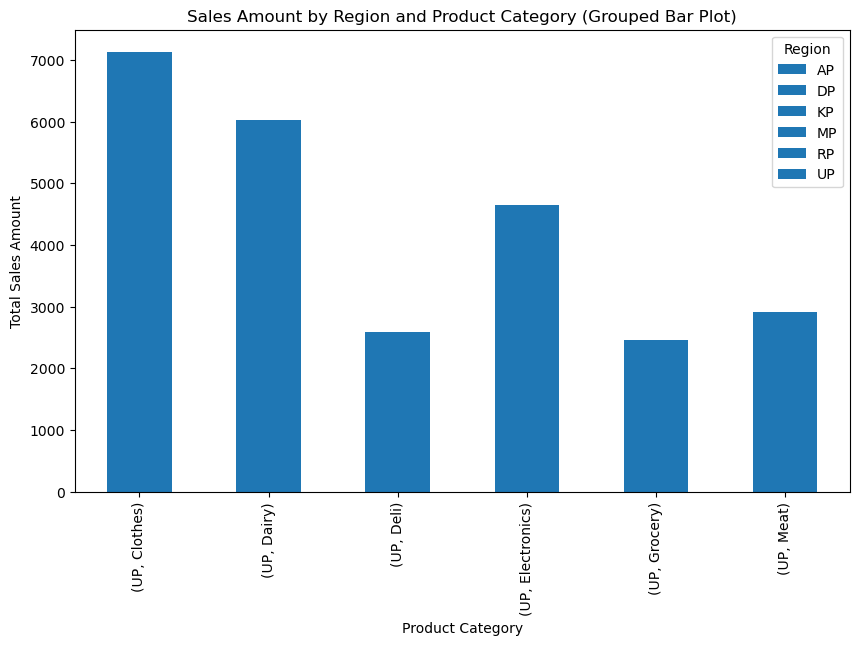

In [9]:
# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for region, group in region_category_sales.groupby('State'):
    group.plot(x='Shop_Category', y='Sales', kind='bar', ax=ax, label=region)

plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Region and Product Category (Grouped Bar Plot)')
plt.legend(title='Region')
plt.show()
